## Linear Regression In Python

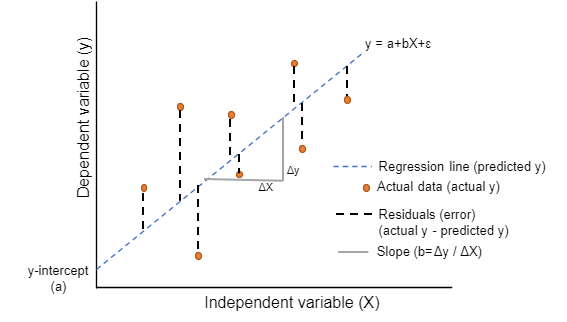

## What is Linear Regression?Permalink

Linear regression is a supervised machine learning algorithm that models the linear relationship between independent (X) variables and dependent variable (y). In simple linear regression (univariate), there is one independent variable, whereas in multiple linear regression, there are multiple independent variables in a model.

In regression, the independent and dependent variables are also known as features and target variables, respectively. Once the linear regression model is fitted, the regression model is useful to predict the value of (y) based on the given X values. A regression problem differs from a classification problem in that regression has an infinite number of possible outcomes, while classification only has a limited number of class label outcomes.

In simple linear regression, linear relationships between y and X variables can be explained by a single X variable

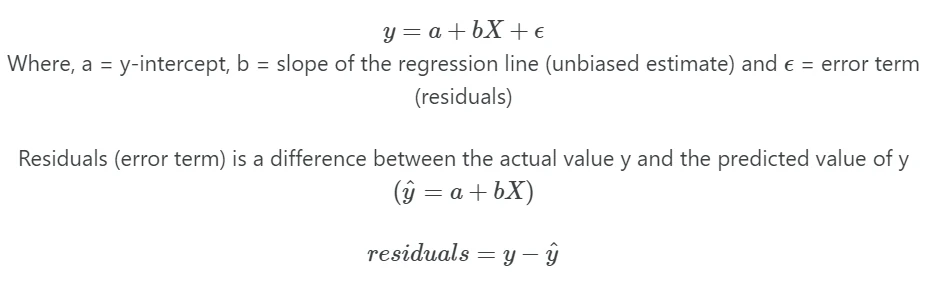

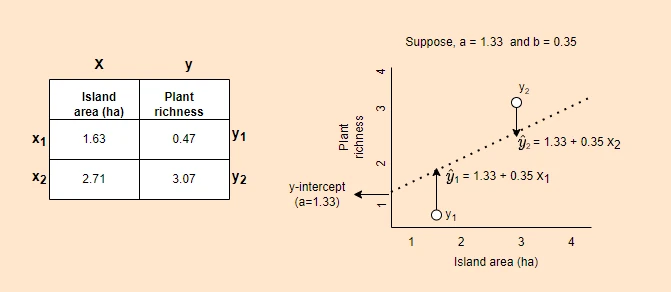

In multiple linear regression, linear relationships between Y and X variables can be explained by multiple independent (X) variables

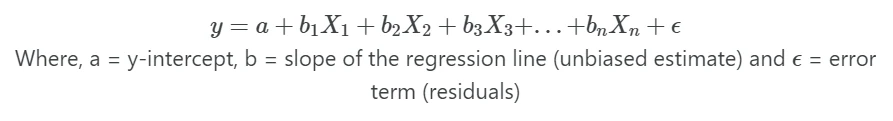

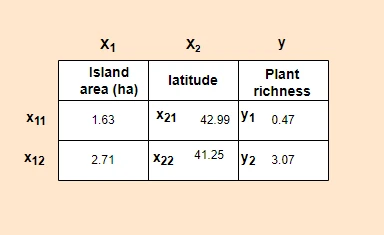

**Note**: In regression, dependent variable also called a response, outcome, regressand, criterion, or endogenous variable. Independent variable also called explanatory, covariates, predictor, regressor, exogenous, manipulated, or feature variable.

## Linear Regression AssumptionsPermalink

- Linear relationship: The relationship between the independent (X) and dependent (y) variables should be linear It can be tested using the residual scatterplot (residuals vs fitted values).

- Independence of residuals (errors): The residuals should be independent of each other. In case of time series data, there should be no autocorrelation (correlation between successive residuals). Autocorrelation can be tested using the Durbin-Watson test.

- Homogeneity of variance (Homoscedasticity): The residuals should have equal variance. It can be tested using the residual scatterplot (residuals vs fitted values).

- Normality: Residuals should be normally distributed. It can be tested using the Quantile-quantile (QQ) plot.

## Perform Simple Linear Regression In Python

For performing the simple linear regression, we will use the plant species richness data to study the influence of island area on the native plant richness of islands. The data is collected from 22 different coastal islands (McMaster 2005).

The dataset contains native plant richness (ntv_rich) as a dependent variable (y) and island area as the independent variable (X).

In [3]:
!pip install bioinfokit

     ---------------------------------------- 87.0/87.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58688 sha256=9cbfeaa9b604fd970eed75c8e659b2bc123715a17cef3212ccb2d35340bd6b57
  Stored in directory: c:\users\administrator.lab-student\appdata\local\pip\cache\wheels\c9\ab\ed\8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=077a7c8b7157952a4f8e99751be9f9fed61db7f2f31fefff8a6929dee756c13d
  Stored in directory: c:\users\administrator.lab-student\appdata\local\pip\cache\wheels\6b\1d\79\4326d5f3a7d86fb9900e5564e7a0f98b552da5103ca762f24f
 


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from bioinfokit.analys import stat, get_data
import numpy as np
import pandas as pd

df = get_data('plant_richness_lr').data
print(df.head(2))
print()   
X = df['area']   # independent variable
y = df['ntv_rich']   # dependent variable

print(X)
print(y)

   ntv_rich      area
0  1.897627  1.602060
1  1.633468  0.477121

0     1.602060
1     0.477121
2     3.432488
3     1.785330
4     3.075547
5     3.130334
6     4.133539
7     0.602060
8     0.602060
9     3.278754
10    2.107210
11    1.000000
12    4.133539
13    0.903090
14    4.425990
15    2.146128
16    4.037426
17    3.361728
18    1.531479
19    2.544068
20    1.672098
21    1.662758
Name: area, dtype: float64
0     1.897627
1     1.633468
2     2.597695
3     2.238046
4     2.712650
5     2.396199
6     2.572872
7     1.176091
8     1.875061
9     2.568202
10    2.079181
11    1.380211
12    2.781755
13    1.322219
14    2.792392
15    1.944483
16    2.795880
17    2.558709
18    2.257679
19    2.350248
20    1.995635
21    1.838849
Name: ntv_rich, dtype: float64


## Fit the model

Here, we will use sklearn and statsmodels packages for linear regression analysis. sklearn focuses on prediction analysis, while statsmodels provides detailed statistical output for linear regression analysis.

**Now, fit the regression using sklearn LinearRegression() function. It employs the ordinary least squares (OLS) method for regression analysis.**

In [2]:
from sklearn.linear_model import LinearRegression

X = np.array(X).reshape(-1, 1) # sklearn requires in 2D array
y = np.array(y)
reg = LinearRegression().fit(X, y)

# get regression coefficient (slope)
reg.coef_

# get y intercept
reg.intercept_

# predict y (y hat) when X 2.5
reg.predict([[2.5]])

array([2.22539668])

**Now, fit the regression using statsmodels OLS function, which takes the following required arguments for performing the regression analysis. In addition, you need to explicitly add the intercept as it is not included in the model.**

    endog: dependent variable (y)
    exog: independent variable (X)

In [3]:
import statsmodels.api as sm

# add intercept (optional)
X = sm.add_constant(X)

# fit the simple linear regression model
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     96.13
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.40e-09
Time:                        13:49:00   Log-Likelihood:                 4.0471
No. Observations:                  22   AIC:                            -4.094
Df Residuals:                      20   BIC:                            -1.912
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3360      0.096     13.869      0.000       1.135       1.537
x1             0.3557      0.036      9.805      0.000       0.280       0.431
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.278
Skew:                          -0.033   Prob(JB):                        0.870
Kurtosis:                       2.453   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation

- The regression line with equation [y = 1.3360 + (0.3557*area) ] is helpful to predict the value of the native plant richness (ntv_rich) from the given value of the island area (area).

- The p value associated with the area is significant (p < 0.001). It suggests that the island area significantly influences native plant richness.

- From the ANOVA F test, the p value is significant (p = 4.40e-09), which suggests that there is a significant relationship between native plant richness and island area. The independent variable (area) can reliably predict the dependent (ntv_rich) variable.

- The coefficient of determination (R-Squared or r2 score) is 0.828 (82.8%), which suggests that 82.8% of the variance in ntv_rich can be explained by area alone. Adjusted R-Squared is useful where there are multiple X variables in the model.

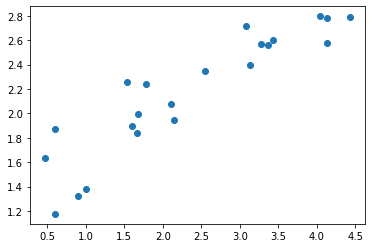

In [8]:
# df.plot(x=df['area'],y=df['ntv_rich'], kind="scatter")

import matplotlib.pyplot as plt

plt.scatter(x=df['area'],y=df['ntv_rich'])

In [9]:
df.corr()

,ntv_rich,area
ntv_rich,1.000000,0.909827
area,0.909827,1.000000


## Regression metrics

The performance of the fitted regression model can be evaluated by various metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean absolute error (MAE), and Mean Absolute Percentage Error (MAPE). The error should be as close to zero as possible. Models with lower error metrics perform better.

1. Mean Absolute Error: 

Mean Absolute Error (MAE): When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.

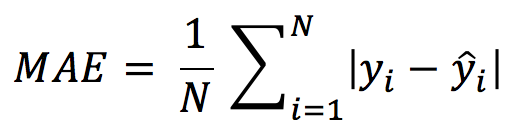

2. Mean Squared Error (MSE): 

It is similar to the MAE metric, but it squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.

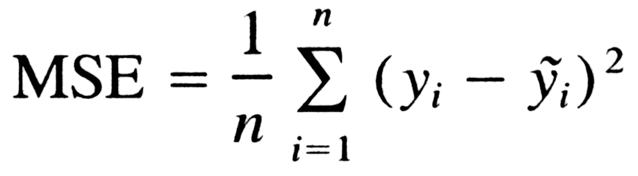

### Consequences of the Square Term

Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. We can only compare our model’s error metrics to those of a competing model. The effect of the square term in the MSE equation is most apparent with the presence of outliers in our data. While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. This ultimately means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE. Similarly, our model will be penalized more for making predictions that differ greatly from the corresponding actual value. This is to say that large differences between actual and predicted are punished more in MSE than in MAE. The following picture graphically demonstrates what an individual residual in the MSE might look like.


3. Root Mean Squared Error (RMSE): 

Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. It is easier to interpret and good when we need to display or show the actual value of the data with the error. It shows how much the data may vary, so, if we have an RMSE of 4.35, our model can make an error either because it added 4.35 to the actual value, or needed 4.35 to get to the actual value. The closer to 0, the better as well.

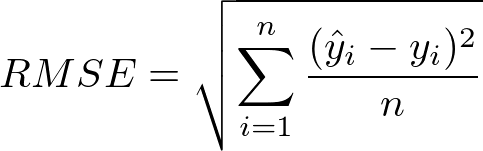

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Mean Squared Error (MSE)
mean_squared_error(y_true=np.array(y), y_pred=reg.predict(X))

0.040526694923992995

In [13]:
# Root Mean Squared Error (RMSE)
mean_squared_error(y_true=np.array(y), y_pred=reg.predict(X), squared=False)

0.20131243112136168

In [14]:
# Mean absolute error (MAE)
mean_absolute_error(y_true=np.array(y), y_pred=reg.predict(X))

0.1553947708650103

In [15]:
# Mean Absolute Percentage Error (MAPE)
mean_absolute_percentage_error(y_true=np.array(y), y_pred=reg.predict(X))

0.08535561662125024

## Verify linear Regression asumptions

### 1. Residuals vs fitted (y_hat) plot: 

This plot used to check for linearity, variances and outliers in the regression data

In [16]:
# get residuals and standardized residuals and add to original dataframe
df['res'] = pd.DataFrame(reg.resid)
df['std_res'] = reg.get_influence().resid_studentized_internal
df.head(2)

,ntv_rich,area,res,std_res
0,1.897627,1.602060,-0.008337,-0.040767
1,1.633468,0.477121,0.127689,0.655482


In [17]:
# create fitted (y_hat) vs residuals plot
visuz.stat.reg_resid_plot(df=df, yhat='yhat', resid='res', stdresid='std_res')
# plot will be saved in same dir (resid_plot.png and std_resid_plot.png)
# set parameter show=True, if you want view the image instead of saving

NameError: name 'visuz' is not defined

As the data is pretty equally distributed around the line=0 in the residual plot, it meets the assumption of residual equal variances (homoscedasticity) and linearity. The outliers could be detected here if the data lies far away from the line=0.

In the standardized residual plot, the residuals are within -2 and +2 range and suggest that it meets assumptions of linearity

## Quantile-quantile (QQ) plot: 

This plot used to check the data normality assumption

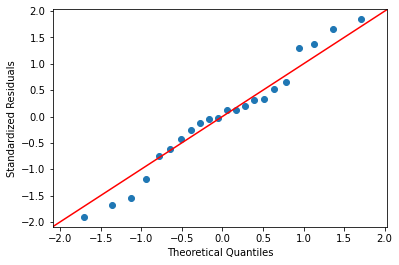

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# create QQ plot
# line=45 option to plot the data around 45 degree line
sm.qqplot(df['std_res'], line='45') 
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

From the plot,

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are normally distributed